# Brain Tumor Classification with ResNet

## Data Preparation

In [71]:
# import libraries

import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator

In [43]:
def crop_imgs(img_set, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in img_set:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)


In [3]:
!unzip tumor_dataset.zip

Archive:  tumor_dataset.zip
  inflating: no/1 no.jpeg            
  inflating: no/10 no.jpg            
  inflating: no/11 no.jpg            
  inflating: no/12 no.jpg            
  inflating: no/13 no.jpg            
  inflating: no/14 no.jpg            
  inflating: no/15 no.jpg            
  inflating: no/17 no.jpg            
  inflating: no/18 no.jpg            
  inflating: no/19 no.jpg            
  inflating: no/2 no.jpeg            
  inflating: no/20 no.jpg            
  inflating: no/21 no.jpg            
  inflating: no/22 no.jpg            
  inflating: no/23 no.jpg            
  inflating: no/24 no.jpg            
  inflating: no/25 no.jpg            
  inflating: no/26 no.jpg            
  inflating: no/27 no.jpg            
  inflating: no/28 no.jpg            
  inflating: no/29 no.jpg            
  inflating: no/3 no.jpg             
  inflating: no/30 no.jpg            
  inflating: no/31 no.jpg            
  inflating: no/32 no.jpg            
  inflating: no/33 no.

In [56]:
def augment(img_set, dest_dir, num_replication):
    data_gen = ImageDataGenerator(rotation_range=10, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1, 
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True, 
                                  vertical_flip=True, 
                                  fill_mode='nearest')

    for img in img_set:
        img = img.reshape((1,) + img.shape)
        count = 0
        for batch in data_gen.flow(x=img, batch_size=1, save_to_dir=dest_dir, save_format='jpg'):
            count += 1
            if count > num_replication:
                break

In [50]:
def plot_img(img, title=""):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    plt.title(title)

In [20]:
def read_imgs(file_dir):
    img_set = []
    for filename in listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        img_set.append(image)
    return img_set    

In [21]:
yes_img_set = read_imgs('yes')
no_img_set = read_imgs('no')

In [25]:
print("pos data count: ", len(yes_img_set))
print("neg data count: ", len(no_img_set))

pos data count:  155
neg data count:  98


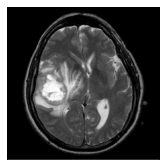

In [39]:
plot_img(yes_img_set[22])

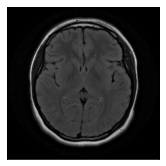

In [35]:
plot_img(no_img_set[2])

In [48]:
yes_img_set_cropped = crop_imgs(yes_img_set)
no_img_set_cropped = crop_imgs(no_img_set)

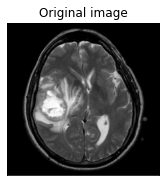

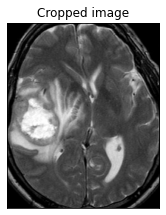

In [51]:
plot_img(yes_img_set[22], "Original image")
plot_img(yes_img_set_cropped[22], "Cropped image")

In [60]:
augment(yes_img_set_cropped, 'augmented/yes', 6)
augment(no_img_set_cropped, 'augmented/no', 7)

In [70]:
num_yes = len(listdir('augmented/yes'))
num_no = len(listdir('augmented/no'))
    
print("Dataset Size:" , num_yes + num_no)
print("Positive samples num:", num_yes, ", Percentage:", num_yes/(num_yes + num_no) * 100)
print("Negative samples num:", num_no, ", Percentage:", num_no/(num_yes + num_no) * 100)

Dataset Size: 1789
Positive samples num: 1030 , Percentage: 57.57406372275013
Negative samples num: 759 , Percentage: 42.42593627724986


In [74]:
def load_data(dir_list):
    X = []
    y = []
    
    for directory in dir_list:
        for filename in listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = image / 255
            X.append(image)
            target = int(directory.contains('yes'))
            y.append(target)
                
    X = np.array(X)
    y = np.array(y)
    
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [75]:
load_data('augmented')

FileNotFoundError: ignored

## Classification


## Furthur investigation


### Batch Normalization

### Dropout

### Visualization